In [2]:
import glob
import re
import numpy as np
import pandas as pd
import clima_anom as ca
from netCDF4 import Dataset

import matplotlib.pyplot as plt

import matplotlib.cbook
import matplotlib.gridspec as gridspec

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [5]:
data = ca.read_netcdf('/mnt/Data/Data/IMERG/season/summer/IMERG_2001_01_2020_12_24h_05x05_summer.nc',0)
lat = data['lat']
lon = data['lon']
pre_summer = data['pre']
mean_summer = np.mean(pre_summer,axis=0)

ntime, nlat, nlon = np.shape(pre_summer)


data = ca.read_netcdf('/mnt/Data/Data/IMERG/season/autumn/IMERG_2001_01_2020_12_24h_05x05_autumn.nc',0)
pre_autumn = data['pre']
mean_autumn = np.mean(pre_autumn,axis=0)

data = ca.read_netcdf('/mnt/Data/Data/IMERG/season/winter/IMERG_2001_01_2020_12_24h_05x05_winter.nc',0)
pre_winter = data['pre']
mean_winter = np.mean(pre_winter,axis=0)

data = ca.read_netcdf('/mnt/Data/Data/IMERG/season/spring/IMERG_2001_01_2020_12_24h_05x05_spring.nc',0)
pre_spring = data['pre']
mean_spring = np.mean(pre_spring,axis=0)

In [10]:
list_dir = ['/mnt/Data/Data/IMERG/season/summer/IMERG_2001_01_2020_12_24h_05x05_summer.nc',
'/mnt/Data/Data/IMERG/season/autumn/IMERG_2001_01_2020_12_24h_05x05_autumn.nc',
'/mnt/Data/Data/IMERG/season/winter/IMERG_2001_01_2020_12_24h_05x05_winter.nc',
'/mnt/Data/Data/IMERG/season/spring/IMERG_2001_01_2020_12_24h_05x05_spring.nc']

season_mean = None
for t in range(4):
    data = ca.read_netcdf(list_dir[t],0)

    if season_mean is None:
        lat = data['lat']
        lon = data['lon']

        nlat = len(lat)
        nlon = len(lon)

        lon2d, lat2d = np.meshgrid(lon, lat)

        season_mean = np.zeros([4,nlat,nlon])

    season_mean[t,:,:] = np.mean(data['pre'],axis=0)


../images/IMERG_Season_climatology.png


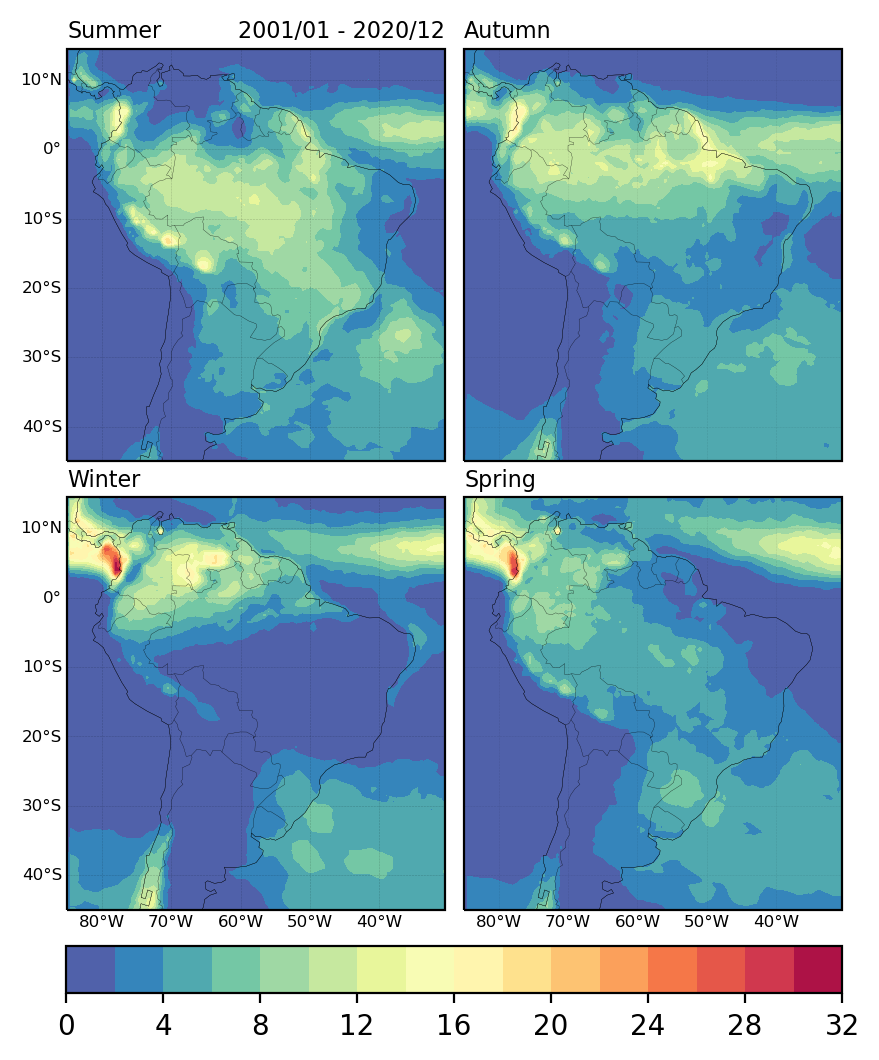

In [21]:
season_names = ['Summer', 'Autumn', 'Winter', 'Spring']
linewidth_shape = 0.2
levels = np.arange(0,34,2)

proj = ccrs.PlateCarree()
cmap = plt.cm.Spectral_r

fig = plt.figure(figsize=(5,5.8),dpi=200)
gs = gridspec.GridSpec(2,2)

a = 0
for row in range(2):
    for col in range(2):
        ax1 = plt.subplot(gs[row, col], projection = proj)
        ax1.coastlines(linestyle='-',linewidth=0.1,color='black',zorder=4)
        ax1.add_feature(cfeature.COASTLINE,linewidth=0.1,color='black',zorder=4)
        ax1.add_feature(cfeature.BORDERS,linewidth=0.1,color='black',zorder=4)
        a1 = ax1.contourf(lon2d, lat2d,season_mean[a,:,:],levels = levels, cmap=cmap)
        ax1.set_title(season_names[a],fontsize=8,loc='left',pad = 4)
        # plt.colorbar(a1)
        # ax1.text(0.1, 0.25, list_month[a], va='bottom', ha='center',rotation_mode='anchor',transform=ax1.transAxes)

        if col == 0:
            gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='k',alpha=0.1,linestyle='--')
            gl.top_labels = False
            gl.bottom_labels = False
            gl.left_labels = True
            gl.right_labels = False
            gl.xlabel_style = {'size': 6, 'color': 'k'}
            gl.ylabel_style = {'size': 6, 'color': 'k'}

        if col == 0  and row == 0:
            ax1.set_title('2001/01 - 2020/12',fontsize=8,loc='right',pad = 4)

        if row == 1:
            gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='k',alpha=0.1,linestyle='--')
            gl.top_labels = False
            gl.bottom_labels = True
            gl.left_labels = False
            gl.right_labels = False
            gl.xlabel_style = {'size': 6, 'color': 'k'}
            gl.ylabel_style = {'size': 6, 'color': 'k'}

        else:
            gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='k',alpha=0.1,linestyle='--')
            gl.top_labels = False
            gl.bottom_labels = False
            gl.left_labels = False
            gl.right_labels = False
            gl.xlabel_style = {'size': 6, 'color': 'k'}
            gl.ylabel_style = {'size': 6, 'color': 'k'}  

        a = a + 1

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, hspace=0.05, wspace=0.05)

cbaxes = fig.add_axes([0.124, 0.06, 0.776, 0.04]) 
fig.colorbar(a1, cax = cbaxes,orientation="horizontal")

salida = '../images/IMERG_Season_climatology.png'
print(salida)
plt.savefig(salida,facecolor='white',bbox_inches ='tight',pad_inches = 0.1)